# CPSC 330 - Applied Machine Learning 

## Homework 5: Putting it all together 
### Associated lectures: All material till lecture 11

**Feb 26, 11:59pm: See the [Calendar](https://github.com/UBC-CS/cpsc330-2023W2/tree/main?tab=readme-ov-file#deliverable-due-dates-tentative).**

## Submission instructions <a name="si"></a>
<hr>

_points: 4_

You will receive marks for correctly submitting this assignment. To submit this assignment, follow the instructions below:

- **You may work on this assignment in a group (group size <= 4) and submit your assignment as a group.** 
- Below are some instructions on working as a group.  
    - The maximum group size is 4.
    - You can choose your own group members. 
    - Use group work as an opportunity to collaborate and learn new things from each other. 
    - Be respectful to each other and make sure you understand all the concepts in the assignment well. 
    - It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. 
- Be sure to follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330-2023W2/blob/main/docs/homework_instructions.md).

## Imports

In [1]:
import os

%matplotlib inline
import string
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import os
import re
import sys
from hashlib import sha1

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# import tests_hw5
from sklearn import datasets
from sklearn.compose import make_column_transformer
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    make_scorer,
    precision_score,
    recall_score,
)
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

## Introduction <a name="in"></a>

In this homework you will be working on an open-ended mini-project, where you will put all the different things you have learned so far together to solve an interesting problem.

A few notes and tips when you work on this mini-project: 

#### Tips
1. This mini-project is open-ended, and while working on it, there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). Make sure you explain your decisions whenever necessary. 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions. 

#### Assessment
We plan to grade fairly and leniently. We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you do a bunch of sane things and get a lower accuracy than your friend, don't sweat it.


#### A final note
Finally, this style of this "project" question is different from other assignments. It'll be up to you to decide when you're "done" -- in fact, this is one of the hardest parts of real projects. But please don't spend WAY too much time on this... perhaps "a few hours". Of course if you're having fun you're welcome to spend as much time as you want! But, if so, try not to do it out of perfectionism or getting the best possible grade. Do it because you're learning and enjoying it. Students from the past cohorts have found such kind of labs useful and fun and I hope you enjoy it as well. 

<br><br>

<!-- BEGIN QUESTION -->

## 1. Pick your problem and explain the prediction problem <a name="1"></a>
<hr>

_points: 3_

In this mini project, you will be working on a classification problem of predicting whether a credit card client will default or not. 
For this problem, you will use [Default of Credit Card Clients Dataset](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). In this data set, there are 30,000 examples and 24 features, and the goal is to estimate whether a person will default (fail to pay) their credit card bills; this column is labeled "default.payment.next.month" in the data. The rest of the columns can be used as features. You may take some ideas and compare your results with [the associated research paper](https://www.sciencedirect.com/science/article/pii/S0957417407006719), which is available through [the UBC library](https://www.library.ubc.ca/). 

**Your tasks:**

1. Spend some time understanding the problem and what each feature means. You can find this information in the documentation on [the dataset page on Kaggle](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). Write a few sentences on your initial thoughts on the problem and the dataset. 
2. Download the dataset and read it as a pandas dataframe. 

<div class="alert alert-warning">
    
Solution_1
    
</div>

1) My initial thoughts: Firstly, I believe the BILL/PAY amounts will be useful for determining repayment likelihood. They will need to be transformed by comparing billing and repayment- E.g. Two clients may have spent 300$ and 1400$ in July 2005, but if client 1 only paid 20$ and client 2 paid 1400$, then 1 may be more likely to default on payments. As well, the PAY features will be useful in predicting whether someone will default since the longer someone has an overdue payment, the more likely they will be to default on the next payment.
2) See below

In [2]:
credit_df = pd.read_csv('credit.csv')
credit_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 2. Data splitting <a name="2"></a>
<hr>

_points: 2_

**Your tasks:**

1. Split the data into train (70%) and test (30%) portions with `random_state=76`.

> If your computer cannot handle training on 70% training data, make the test split bigger.  

<div class="alert alert-warning">
    
Solution_2
    
</div>

In [3]:
train_df, test_df = train_test_split(credit_df, test_size=0.4, random_state=76)

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 3. EDA <a name="3"></a>
<hr>

_points: 10_

**Your tasks:**

1. Perform exploratory data analysis on the train set.
2. Include at least two summary statistics and two visualizations that you find useful, and accompany each one with a sentence explaining it.
3. Summarize your initial observations about the data. 
4. Pick appropriate metric/metrics for assessment. 

<div class="alert alert-warning">
    
Solution_3
    
</div>

In [4]:
credit_summary = train_df.describe(include='all')
credit_summary

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.00000,18000.000000,...,18000.000000,18000.00000,18000.000000,18000.000000,1.800000e+04,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000
mean,15035.603611,167587.982222,1.603056,1.847611,1.555833,35.410222,-0.010111,-0.129722,-0.16350,-0.219944,...,43075.060056,40107.74450,38546.664000,5591.170444,6.067774e+03,5160.144389,4926.254500,4768.292111,5186.139611,0.222944
std,8655.725678,129961.179664,0.489278,0.794062,0.520585,9.117407,1.127964,1.201886,1.20151,1.170461,...,63760.357983,60198.73787,58827.461914,16401.192697,2.483201e+04,16823.131807,16731.143597,15425.632664,17376.031385,0.416233
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.00000,-2.000000,...,-170000.000000,-81334.00000,-209051.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7511.250000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.00000,-1.000000,...,2326.750000,1823.00000,1261.000000,990.750000,8.145000e+02,390.000000,287.750000,240.750000,141.500000,0.000000
50%,15086.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.00000,0.000000,...,19035.000000,18097.00000,17112.500000,2134.000000,2.009000e+03,1805.500000,1500.000000,1500.000000,1500.000000,0.000000
75%,22527.750000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.00000,0.000000,...,54900.250000,50149.00000,48976.500000,5014.250000,5.000000e+03,4512.000000,4019.500000,4061.000000,4003.000000,0.000000
max,29999.000000,800000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.00000,8.000000,...,706864.000000,823540.00000,527711.000000,873552.000000,1.684259e+06,889043.000000,621000.000000,426529.000000,528666.000000,1.000000


From these summary statistics, we can see that there are a few features that have values that aren't listed in the dataset description on Kaggle. For example, the MARRIAGE feature has 3 values (1, 2, and 3), but the minimum value in the dataset is 0. Similarly for EDUCATION, the feature has 6 values (1, 2,3, 4, 5, and 6), but it has a minimum value of 0. These values were likely missing values in the dataset.

We can also see that the PAY_0, PAY_1, etc. features have values of 0 and -2, even though these are not listed in the data description on Kaggle. Doing some research, we were able to find that these values correspond to 0= "the use of revolving credit" and -2="no consumption" (reference: https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset/discussion/34608), so these values are correct.

Below are some preliminary analyses on the features to see if there are any correlations between various values and the likelihood of someone defaulting.

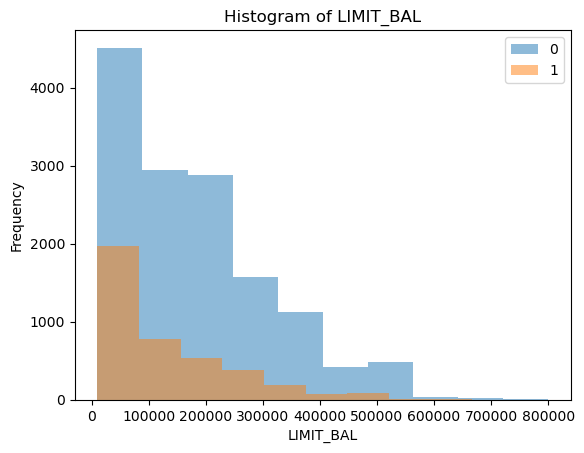

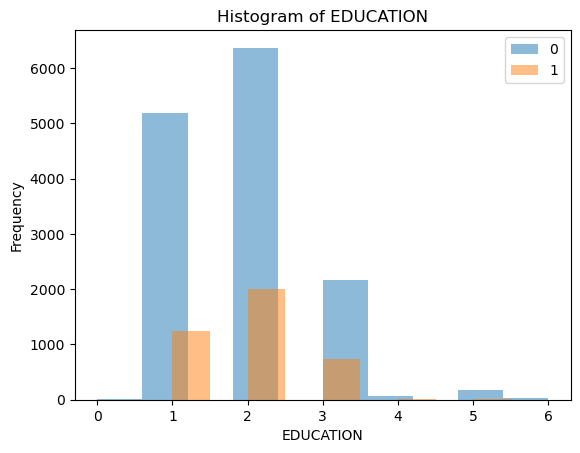

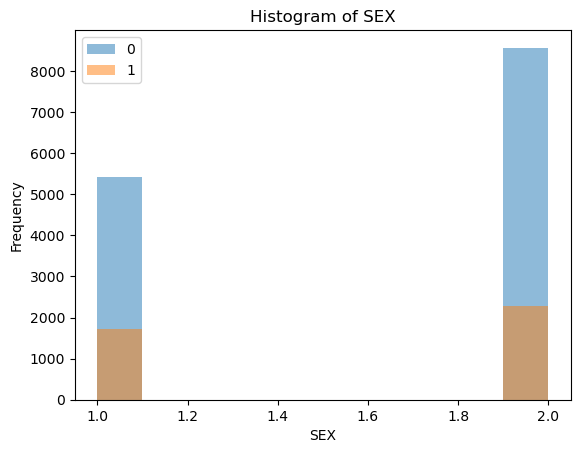

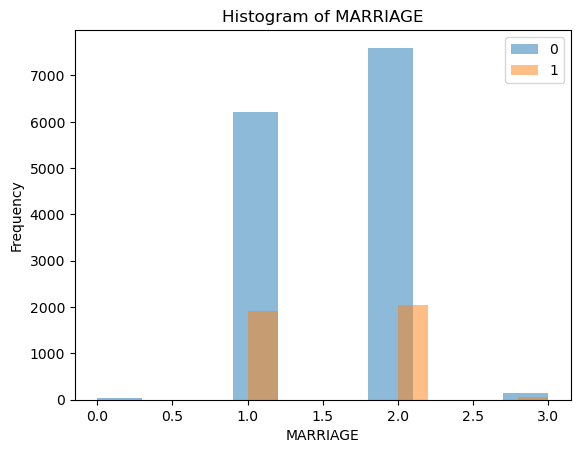

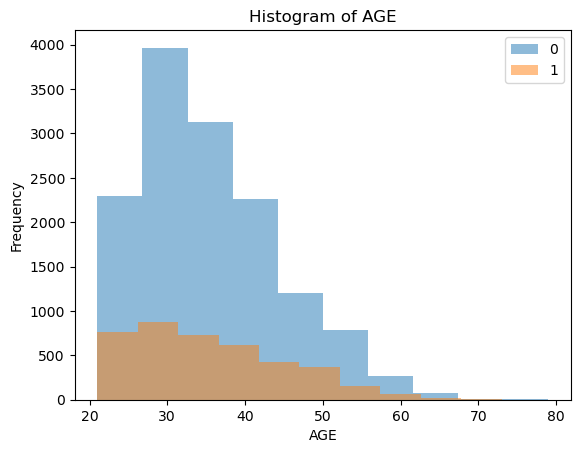

In [5]:
features = ["LIMIT_BAL", "EDUCATION", "SEX", "MARRIAGE", "AGE"]
for feat in features:
    ax = train_df.groupby("default.payment.next.month")[feat].plot.hist(alpha=0.5, legend=True)
    plt.xlabel(feat)
    plt.title("Histogram of " + feat)
    plt.show()


Looking at the above plots, we can make the following observations:

Limit balance: Clients with a limit over 100,000 NT$ are proportionally much less likely to default. 

Education: Clients who have only graduated high school have a higher proportional chance to default.

Sex: Proportionally more male client default than female clients.

Marriage: Proportionally more married clients default compared to single clients.

Age: Clients in their 30s are the least likely to default, and the proportion of clients who default goes up with each age bracket.

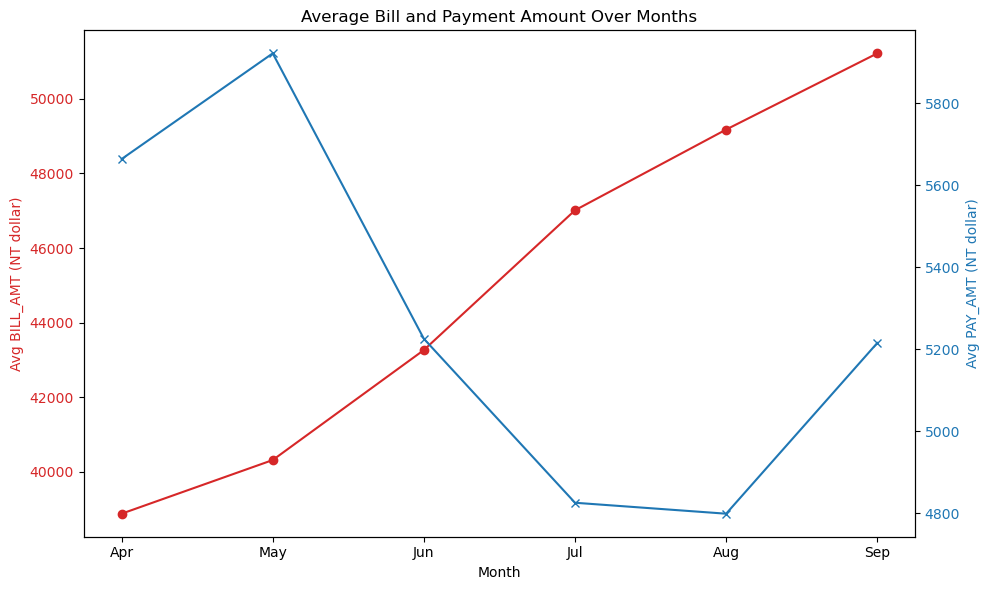

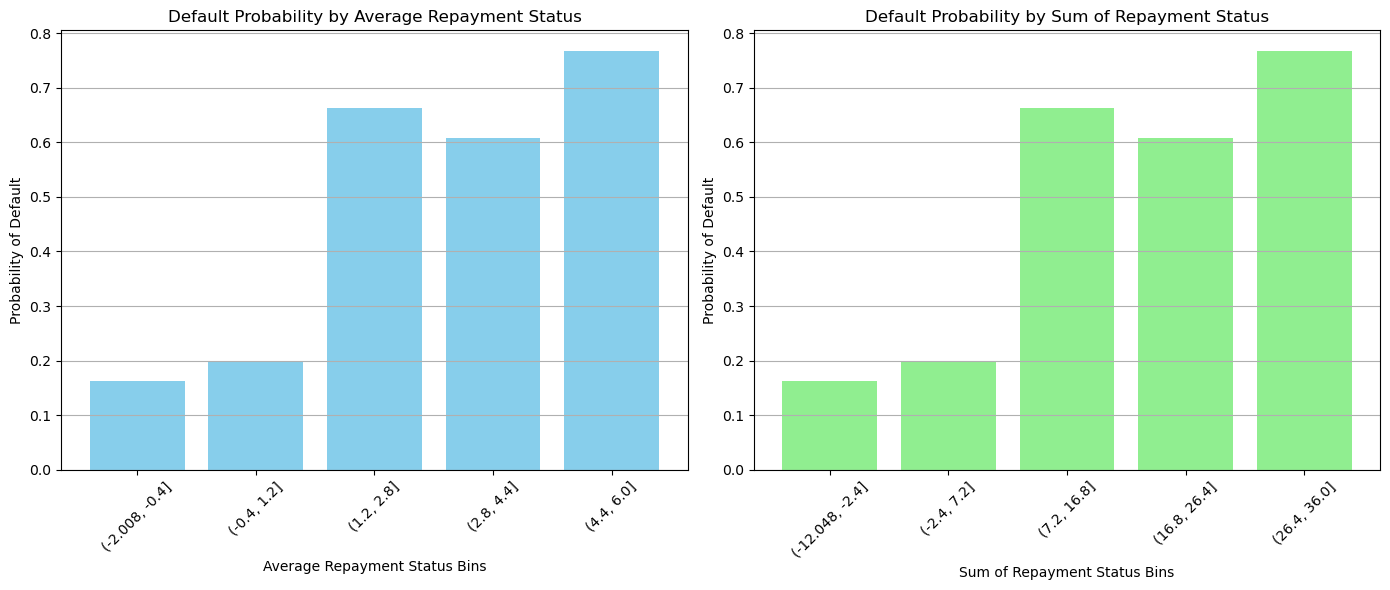

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

months = ['April', 'May', 'June', 'July', 'August', 'September']
avg_bill_amt = credit_df[['BILL_AMT6', 'BILL_AMT5', 'BILL_AMT4', 'BILL_AMT3', 'BILL_AMT2', 'BILL_AMT1']].mean()
avg_pay_amt = credit_df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].mean()
default_rate = credit_df['default.payment.next.month'].mean()

months = ['Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep']

fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:red'
ax1.set_xlabel('Month')
ax1.set_ylabel('Avg BILL_AMT (NT dollar)', color=color)
ax1.plot(months, avg_bill_amt.values, color=color, label='Avg BILL_AMT', marker='o')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx() 
color = 'tab:blue'
ax2.set_ylabel('Avg PAY_AMT (NT dollar)', color=color)
ax2.plot(months, avg_pay_amt.values, color=color, label='Avg PAY_AMT', marker='x')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Average Bill and Payment Amount Over Months')
fig.tight_layout()
plt.show()
plt.show()


# Step 1: Calculate the Aggregate Features
credit_df['avg_repayment_status'] = credit_df[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].mean(axis=1)
credit_df['sum_repayment_status'] = credit_df[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].sum(axis=1)

# Step 2: Create a New DataFrame for Summary Features
summary_features_df = credit_df[['avg_repayment_status', 'sum_repayment_status', 'default.payment.next.month']].copy()


# Step 3: Analyze and Plot

# Group by the new features and calculate the mean default rate
avg_default_rate = summary_features_df.groupby(pd.cut(summary_features_df['avg_repayment_status'], bins=5))['default.payment.next.month'].mean().reset_index(name='Probability of Default')
sum_default_rate = summary_features_df.groupby(pd.cut(summary_features_df['sum_repayment_status'], bins=5))['default.payment.next.month'].mean().reset_index(name='Probability of Default')

plt.figure(figsize=(14, 6))

# Plot for Average Repayment Status
plt.subplot(1, 2, 1)
plt.bar(avg_default_rate['avg_repayment_status'].astype(str), avg_default_rate['Probability of Default'], color='skyblue')
plt.title('Default Probability by Average Repayment Status')
plt.xlabel('Average Repayment Status Bins')
plt.ylabel('Probability of Default')
plt.xticks(rotation=45)
plt.grid(True, axis='y')

# Plot for Sum of Repayment Status
plt.subplot(1, 2, 2)
plt.bar(sum_default_rate['sum_repayment_status'].astype(str), sum_default_rate['Probability of Default'], color='lightgreen')
plt.title('Default Probability by Sum of Repayment Status')
plt.xlabel('Sum of Repayment Status Bins')
plt.ylabel('Probability of Default')
plt.xticks(rotation=45)
plt.grid(True, axis='y')

plt.tight_layout()
plt.show()

From the Average Bill and Pament Amount Over Months plot above, we can see that there seems to be an overall inverse relationship between BILL_AMT and PAY_AMT. That is, as the pay amount decrease, the bill amount increase. This is expected because as people pay their bills less, their outstanding bill amounts increase over time.

From the next two plots, we can see that the chance of defaulting increases as the length of time of overdue payments increases.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 4. Preprocessing and transformations <a name="5"></a>
<hr>

_points: 10_

**Your tasks:**

1. Identify different feature types and the transformations you would apply on each feature type. 
2. Define a column transformer, if necessary. 

<div class="alert alert-warning">
    
Solution_4
    
</div>

| Feature | Transformation | Explanation
| --- | ----------- | ----- |
| ID | drop | Not useful for predictions |
| LIMIT_BAL | Scaling | Numerical data, no missing values |
| SEX | one-hot encoding with "binary=True" | The entries only have "1" or "2" |
| EDUCATION | Scaling, combine 0, 5, and 6 | The education levels are already "sorted", but values of 0,5, and 6 are not distinguishable so they should be combined|
| MARRIAGE | one-hot encoding, combine 0 and 3  | Categorical entries with no inherent ordering. Values of 0 should be combined with 3 because they are not distinguishable. |
| AGE | Scaling |  A numeric feature with no missing values. Good idea to apply scaling, as the range of values is quite different compared to other numeric features.|
|PAY_X| Scaling | Categorical feature that is already classified numerically, scaling required |
|BILL_AMTX| Scaling | Numeric feature, scaling required |
|PAY_AMTX| Scaling | Numeric feature, scaling required |

In [7]:
#adapted from lecture 6
numeric_features = ["LIMIT_BAL", "AGE", 'EDUCATION', 
                    'BILL_AMT6', 'BILL_AMT5', 'BILL_AMT4', 'BILL_AMT3', 'BILL_AMT2', 'BILL_AMT1',
                    'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
                    'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
binary_features = ["SEX"] 
categorical_features = ["MARRIAGE"]
drop_features = ["ID"] 
target = 'default.payment.next.month'

#combined values for education
train_df['EDUCATION'] = train_df['EDUCATION'].replace(0, 5)
test_df['EDUCATION'] = test_df['EDUCATION'].replace(0, 5)
train_df['EDUCATION'] = train_df['EDUCATION'].replace(6, 5)
test_df['EDUCATION'] = test_df['EDUCATION'].replace(6, 5)

#combined values for marriage
train_df['MARRIAGE'] = train_df['MARRIAGE'].replace(0, 3)
test_df['MARRIAGE'] = test_df['MARRIAGE'].replace(0, 3)

# separate data
X_train = train_df.drop(columns=target)
y_train = train_df[target]
X_test = test_df.drop(columns=target)
y_test = test_df[target]

#create transformers
numeric_transformer = StandardScaler()
binary_transformer = OneHotEncoder(drop="if_binary", dtype=int)
binary_transformer.fit(X_train[["SEX"]])
categorical_transformer = OneHotEncoder(handle_unknown="ignore", sparse=False)

ct = make_column_transformer(
    (numeric_transformer, numeric_features),
    (binary_transformer, binary_features),
    (categorical_transformer, categorical_features),
    ("drop", drop_features)
)

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 5. Baseline model <a name="6"></a>
<hr>

_points: 2_

**Your tasks:**
1. Try `scikit-learn`'s baseline model and report results.

<div class="alert alert-warning">
    
Solution_5
    
</div>

In [8]:
# Adapted from hw3

results_dict = {}

def mean_std_cross_val_scores(model, X_train, y_train, **kwargs):
    """
    Returns mean and std of cross validation

    Parameters
    ----------
    model :
        scikit-learn model
    X_train : numpy array or pandas DataFrame
        X in the training data
    y_train :
        y in the training data

    Returns
    ----------
        pandas Series with mean scores from cross_validation
    """

    scores = cross_validate(model, X_train, y_train, **kwargs)

    mean_scores = pd.DataFrame(scores).mean()
    std_scores = pd.DataFrame(scores).std()
    out_col = []

    for i in range(len(mean_scores)):
        out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores.iloc[i], std_scores.iloc[i])))

    return pd.Series(data=out_col, index=mean_scores.index)

In [9]:
dummy = DummyClassifier()
pipe = make_pipeline(ct, dummy)
results_dict["Dummy"] = mean_std_cross_val_scores(pipe, X_train, y_train, cv=5, return_train_score=True)
results_df = pd.DataFrame(results_dict).T
results_df

,fit_time,score_time,test_score,train_score
Dummy,0.015 (+/- 0.001),0.005 (+/- 0.000),0.777 (+/- 0.000),0.777 (+/- 0.000)


<br><br>

<!-- BEGIN QUESTION -->

## 6. Linear models <a name="7"></a>
<hr>

_points 10_

**Your tasks:**

1. Try a linear model as a first real attempt. 
2. Carry out hyperparameter tuning to explore different values for the complexity hyperparameter. 
3. Report cross-validation scores along with standard deviation. 
4. Summarize your results.

<div class="alert alert-warning">
    
Solution_6
    
</div>

In [10]:
lr = LogisticRegression(max_iter=100000, random_state=123)
pipe = make_pipeline(ct, lr)
results_dict["Logistic Regression"] = mean_std_cross_val_scores(pipe, X_train, y_train, cv=5, return_train_score=True)
results_df = pd.DataFrame(results_dict).T
results_df

,fit_time,score_time,test_score,train_score
Dummy,0.015 (+/- 0.001),0.005 (+/- 0.000),0.777 (+/- 0.000),0.777 (+/- 0.000)
Logistic Regression,0.092 (+/- 0.007),0.006 (+/- 0.001),0.810 (+/- 0.005),0.810 (+/- 0.001)


In [11]:
C_vals = 10.0 ** np.arange(-5, 4, 1)

scores_dict= {
    "C": [],
    "mean_train_score": [],
    "mean_cv_score": [],
    "std_cv_score": [],
}

for C in C_vals:
    lr = LogisticRegression(max_iter=10000, C=C)
    pipe = make_pipeline(ct, lr)
    scores = cross_validate(pipe, X_train, y_train, return_train_score=True)
    scores_dict["C"].append(C)
    scores_dict["mean_train_score"].append(scores["train_score"].mean())
    scores_dict["mean_cv_score"].append(scores["test_score"].mean())
    scores_dict["std_cv_score"].append(scores["test_score"].std())

res_df = pd.DataFrame(scores_dict)
res_df

,C,mean_train_score,mean_cv_score,std_cv_score
0,0.00001,0.777056,0.777056,0.000136
1,0.00010,0.778556,0.778611,0.001438
2,0.00100,0.798153,0.798222,0.003823
3,0.01000,0.808236,0.808556,0.004315
4,0.10000,0.809875,0.809778,0.004418
5,1.00000,0.809972,0.809778,0.004589
6,10.00000,0.809986,0.809778,0.004589
7,100.00000,0.809972,0.809722,0.004517
8,1000.00000,0.809986,0.809722,0.004517


The best C value is 10, and gives a train score of 0.809986 and a cv score of 0.809778. The standard deviation is low across the board. This model performs better than the Dummy Classifier.

In [12]:
lr = LogisticRegression(max_iter=100000, random_state=123, C=10.0)
pipe = make_pipeline(ct, lr)
results_dict["Logistic Regression best"] = mean_std_cross_val_scores(pipe, X_train, y_train, cv=5, return_train_score=True)
results_df = pd.DataFrame(results_dict).T
results_df

,fit_time,score_time,test_score,train_score
Dummy,0.015 (+/- 0.001),0.005 (+/- 0.000),0.777 (+/- 0.000),0.777 (+/- 0.000)
Logistic Regression,0.092 (+/- 0.007),0.006 (+/- 0.001),0.810 (+/- 0.005),0.810 (+/- 0.001)
Logistic Regression best,0.058 (+/- 0.007),0.005 (+/- 0.000),0.810 (+/- 0.005),0.810 (+/- 0.001)


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 7. Different models <a name="8"></a>
<hr>

_points: 12_

**Your tasks:**
1. Try at least 3 other models aside from a linear model. One of these models should be a tree-based ensemble model. 
2. Summarize your results in terms of overfitting/underfitting and fit and score times. Can you beat a linear model? 

<div class="alert alert-warning">
    
Solution_7
    
</div>

In [13]:
models = {
    "random forest": RandomForestClassifier(random_state=42),
    "kNN": KNeighborsClassifier(),
    "RBF SVM": SVC(random_state=42),
}

pipelineRandForest = make_pipeline(ct, models["random forest"])
pipelineKNN = make_pipeline(ct, models["kNN"])
pipelineRBF = make_pipeline(ct, models["RBF SVM"])

results_dict["random forest"] = mean_std_cross_val_scores(pipelineRandForest, X_train, y_train, cv=5, return_train_score=True)
results_dict["kNN"] = mean_std_cross_val_scores(pipelineKNN, X_train, y_train, cv=5, return_train_score=True)
results_dict["RBF SVM"] = mean_std_cross_val_scores(pipelineRBF, X_train, y_train, cv=5, return_train_score=True)

income_pred_results_df = pd.DataFrame(results_dict).T

income_pred_results_df

,fit_time,score_time,test_score,train_score
Dummy,0.015 (+/- 0.001),0.005 (+/- 0.000),0.777 (+/- 0.000),0.777 (+/- 0.000)
Logistic Regression,0.092 (+/- 0.007),0.006 (+/- 0.001),0.810 (+/- 0.005),0.810 (+/- 0.001)
Logistic Regression best,0.058 (+/- 0.007),0.005 (+/- 0.000),0.810 (+/- 0.005),0.810 (+/- 0.001)
random forest,2.893 (+/- 0.188),0.063 (+/- 0.003),0.817 (+/- 0.003),1.000 (+/- 0.000)
kNN,0.018 (+/- 0.004),0.191 (+/- 0.052),0.792 (+/- 0.008),0.842 (+/- 0.001)
RBF SVM,5.464 (+/- 1.315),1.538 (+/- 0.416),0.819 (+/- 0.006),0.825 (+/- 0.001)


The only new classifier that performed better than Logistic Regression is RBF SVM, but it had a significantly worse fit and score time than any of the other models. The values for test and train score are relatively close together for RBF SVM, indicating that this model is not under/overfitting and will generalize well to unseen data. The kNN model has the highest degree of overfitting as is indicated by the discrepancy between the test and train score. Out of the new models, the random forest model shows the least degree of over/underfitting as the values for test and train score are very close together.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 8. Hyperparameter optimization <a name="10"></a>
<hr>

_points: 10_

**Your tasks:**

Make some attempts to optimize hyperparameters for the models you've tried and summarize your results. In at least one case you should be optimizing multiple hyperparameters for a single model. You may use `sklearn`'s methods for hyperparameter optimization or fancier Bayesian optimization methods. 
  - [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)   
  - [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
  - [scikit-optimize](https://github.com/scikit-optimize/scikit-optimize) 

<div class="alert alert-warning">
    
Solution_8
    
</div>

In [14]:
def optimize_hyperparameters(model, params_grid, X_train, y_train, cv=5):
    grid_search = GridSearchCV(model, params_grid, cv=cv, return_train_score=True)
    grid_search.fit(X_train, y_train)
    print(f"Best parameters for {type(model).__name__}: {grid_search.best_params_}")
    return grid_search

# Define parameter grids for each model
param_grid_rf = {
    'randomforestclassifier__max_depth': np.arange(1, 10, 5),
    'randomforestclassifier__n_estimators': np.arange(10, 100, 10)
}

param_grid_knn = {
    'kneighborsclassifier__n_neighbors': np.arange(1, 10, 2),
    'kneighborsclassifier__weights': ['uniform', 'distance']
}

param_grid_svc = {
    'svc__C': [0.1, 1, 10]
}

optimized_rf = optimize_hyperparameters(pipelineRandForest, param_grid_rf, X_train, y_train)
optimized_knn = optimize_hyperparameters(pipelineKNN, param_grid_knn, X_train, y_train)
optimized_svc = optimize_hyperparameters(pipelineRBF, param_grid_svc, X_train, y_train)


Best parameters for Pipeline: {'randomforestclassifier__max_depth': 6, 'randomforestclassifier__n_estimators': 50}
Best parameters for Pipeline: {'kneighborsclassifier__n_neighbors': 9, 'kneighborsclassifier__weights': 'uniform'}
Best parameters for Pipeline: {'svc__C': 1}


In [15]:
models_best = {
    "random forest": RandomForestClassifier(random_state=42, max_depth=6, n_estimators=50),
    "kNN": KNeighborsClassifier(n_neighbors=9, weights='uniform'),
    "RBF SVM": SVC(random_state=42, C=1.0),
}

pipelineRandForest = make_pipeline(ct, models_best["random forest"])
pipelineKNN = make_pipeline(ct, models_best["kNN"])
pipelineRBF = make_pipeline(ct, models_best["RBF SVM"])

results_dict["random forest best"] = mean_std_cross_val_scores(pipelineRandForest, X_train, y_train, cv=5, return_train_score=True)
results_dict["kNN best"] = mean_std_cross_val_scores(pipelineKNN, X_train, y_train, cv=5, return_train_score=True)
results_dict["RBF SVM best"] = mean_std_cross_val_scores(pipelineRBF, X_train, y_train, cv=5, return_train_score=True)

income_pred_results_df = pd.DataFrame(results_dict).T

income_pred_results_df

,fit_time,score_time,test_score,train_score
Dummy,0.015 (+/- 0.001),0.005 (+/- 0.000),0.777 (+/- 0.000),0.777 (+/- 0.000)
Logistic Regression,0.092 (+/- 0.007),0.006 (+/- 0.001),0.810 (+/- 0.005),0.810 (+/- 0.001)
Logistic Regression best,0.058 (+/- 0.007),0.005 (+/- 0.000),0.810 (+/- 0.005),0.810 (+/- 0.001)
random forest,2.893 (+/- 0.188),0.063 (+/- 0.003),0.817 (+/- 0.003),1.000 (+/- 0.000)
kNN,0.018 (+/- 0.004),0.191 (+/- 0.052),0.792 (+/- 0.008),0.842 (+/- 0.001)
RBF SVM,5.464 (+/- 1.315),1.538 (+/- 0.416),0.819 (+/- 0.006),0.825 (+/- 0.001)
random forest best,0.589 (+/- 0.091),0.015 (+/- 0.001),0.820 (+/- 0.006),0.830 (+/- 0.002)
kNN best,0.013 (+/- 0.001),0.152 (+/- 0.002),0.805 (+/- 0.006),0.828 (+/- 0.002)
RBF SVM best,3.870 (+/- 0.074),1.246 (+/- 0.015),0.819 (+/- 0.006),0.825 (+/- 0.001)


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 9. Results on the test set <a name="12"></a>
<hr>

_points: 10_

**Your tasks:**

1. Try your best performing model on the test data: report and explain test scores.
2. Do the test scores agree with the validation scores from before? To what extent do you trust your results? Do you think you've had issues with optimization bias?

<div class="alert alert-warning">
    
Solution_9
    
</div>

The best performing model was Random Forest with hyperparameter values of max_depth=6, n_estimators=50.

In [16]:
pipelineRandForest.fit(X_train, y_train)
test_score = pipelineRandForest.score(X_test, y_test)
print ("Best model : Random Forest Classifier, with a final test score of ", test_score)

Best model : Random Forest Classifier, with a final test score of  0.8205


This test score does agree with the validation scores from before as its value is quite similar. Given that this score and the previous validation scores agree, we can have high trust in the results. There is a small discrepancy between the test and train scores from the validation for the optimized Random Forest Classifier (0.820 and 0.830, respectively) which indicates this model may have a slight tendency to overfit the data. However, this difference is still relatively small, so we can safely assume the result is still credible.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 10. Summary of results <a name="13"></a>
<hr>

_points 12_

Imagine that you want to present the summary of these results to your boss and co-workers. 

**Your tasks:**

1. Create a table (printed `DataFrame`) summarizing important results. 
2. Write concluding remarks.
3. Discuss other ideas that you did not try but could potentially improve the performance/interpretability . 
3. Report your final test score along with the metric you used at the top of this notebook in the [Submission instructions section](#si).

<div class="alert alert-warning">
    
Solution_10
    
</div>

In [17]:
finalTable = {
    "Best Model": ["Random Forest Classifier"],
    "Max Depth": [5],
    "N Estimators": [41],
    "Validation Fit Time": ["0.519 (+/- 0.045)"],
    "Validation Score Time": ["0.015 (+/- 0.001)"],
    "Validation Test Score": ["0.820 (+/- 0.006)"],
    "Validation Train Score": ["0.830 (+/- 0.002)"],
    "Actual Test Score": [test_score]
}

finalTable_df = pd.DataFrame(finalTable)

In [18]:
print("Table 1: Summary of model performance")
income_pred_results_df

Table 1: Summary of model performance


,fit_time,score_time,test_score,train_score
Dummy,0.015 (+/- 0.001),0.005 (+/- 0.000),0.777 (+/- 0.000),0.777 (+/- 0.000)
Logistic Regression,0.092 (+/- 0.007),0.006 (+/- 0.001),0.810 (+/- 0.005),0.810 (+/- 0.001)
Logistic Regression best,0.058 (+/- 0.007),0.005 (+/- 0.000),0.810 (+/- 0.005),0.810 (+/- 0.001)
random forest,2.893 (+/- 0.188),0.063 (+/- 0.003),0.817 (+/- 0.003),1.000 (+/- 0.000)
kNN,0.018 (+/- 0.004),0.191 (+/- 0.052),0.792 (+/- 0.008),0.842 (+/- 0.001)
RBF SVM,5.464 (+/- 1.315),1.538 (+/- 0.416),0.819 (+/- 0.006),0.825 (+/- 0.001)
random forest best,0.589 (+/- 0.091),0.015 (+/- 0.001),0.820 (+/- 0.006),0.830 (+/- 0.002)
kNN best,0.013 (+/- 0.001),0.152 (+/- 0.002),0.805 (+/- 0.006),0.828 (+/- 0.002)
RBF SVM best,3.870 (+/- 0.074),1.246 (+/- 0.015),0.819 (+/- 0.006),0.825 (+/- 0.001)


In [19]:
print("Table 2: Final results")
finalTable_df

Table 2: Final results


,Best Model,Max Depth,N Estimators,Validation Fit Time,Validation Score Time,Validation Test Score,Validation Train Score,Actual Test Score
0,Random Forest Classifier,5,41,0.519 (+/- 0.045),0.015 (+/- 0.001),0.820 (+/- 0.006),0.830 (+/- 0.002),0.8205


We tested and optimized several classification models as seen in Table 1 above. The Dummy model performed the worst as is to be expected. Without optimization, RBF SVM performed the best. Without optimizatiom, the Random Forest model had the lowest degree of overfitting and the kNN model had the highest degree of overfitting. After optimization, the random forest model performed the best. It had a slightly higher degree of overfitting than the optimized RBF SVM model, but since the test and train scores were still relatively close (0.820 and 0.830, respectively), we can be confident that this model will still generalize well to unseen data. Thus, we used the optimized random forest classifier on our test data and achieved a final test score of 0.8205. A summary of the results is seen in Table 2 above. 

The final test score could be improved further by several means. First, other classification models could be tested such as the Decision Tree Classifier. Second, more thorough hyperparameter optimization could be performed on the various models. This could be done by including more values for each hyperparameter or including more hyperparameters for each model.



<!-- END QUESTION -->

<br><br>

<!-- END QUESTION -->

<br><br>

**PLEASE READ:** When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from “1” will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Upload the assignment using [PrairieLearn](https://ca.prairielearn.com/pl/course_instance/6697). Don't forget to rename your file `hw4_sol.ipynb`.

This was a tricky one but you did it!

![](img/eva-well-done.png)